Sales Prediction using python


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/advertising.csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.columns.values.tolist()

['TV', 'Radio', 'Newspaper', 'Sales']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

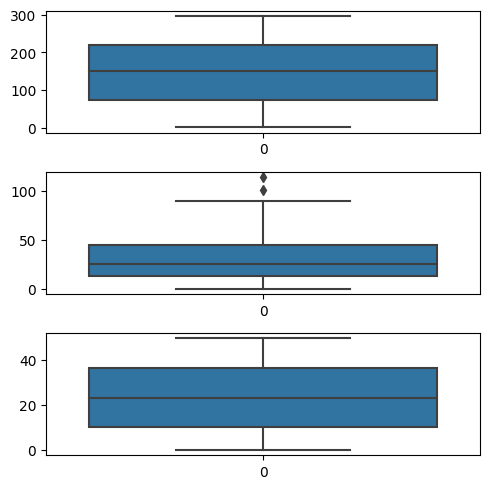

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

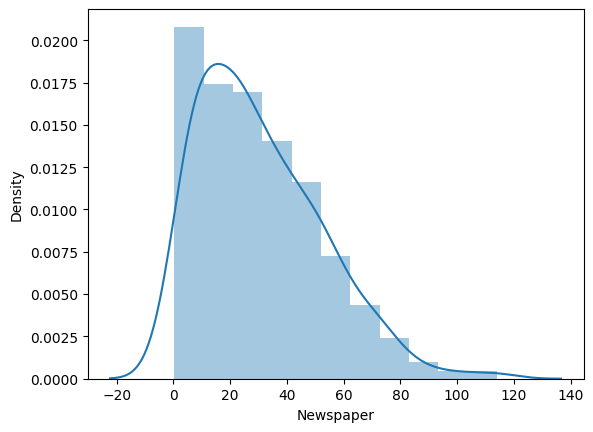

In [ ]:
sns.distplot(df['Newspaper'])


In [ ]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [ ]:
lower_bridge = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge = df['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [ ]:
data = df.copy()


In [ ]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<Axes: >

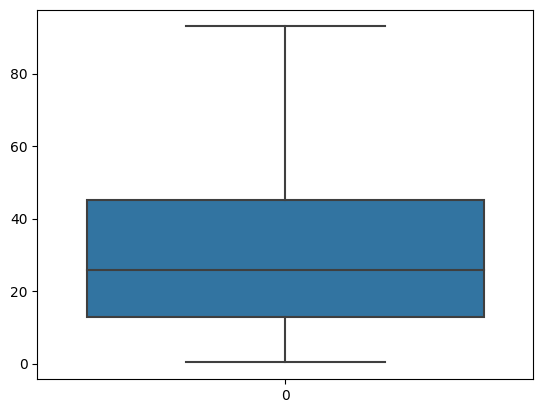

In [ ]:
sns.boxplot(data['Newspaper'])

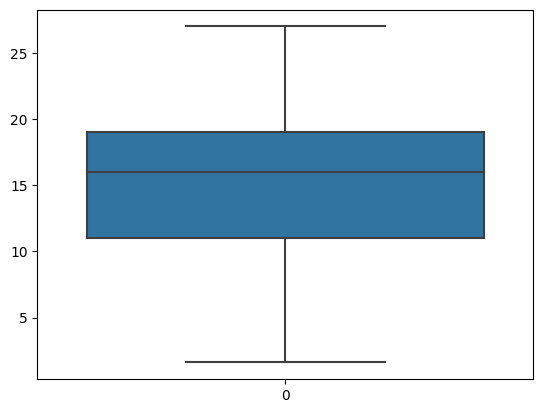

In [ ]:
sns.boxplot(data['Sales']);

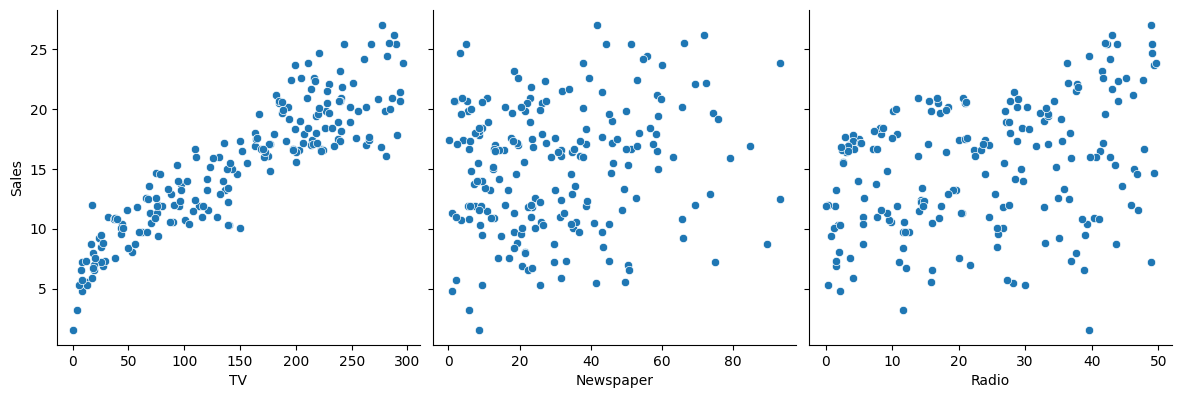

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
             y_vars= 'Sales', height=4, aspect=1, kind='scatter')
plt.show()

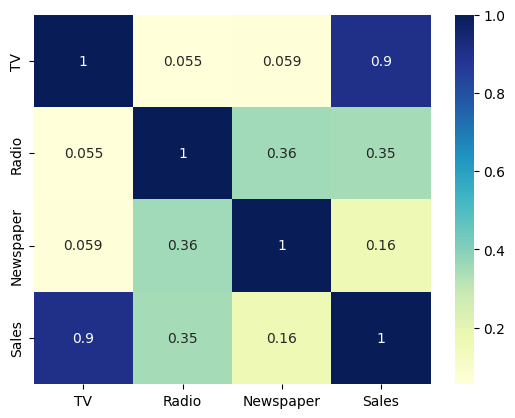

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [ ]:
print(important_features)

['TV', 'Sales']


In [ ]:
x = data['TV']
y = data['Sales']

In [ ]:
x = x.values.reshape(-1,1)

In [ ]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(x.shape,y.shape)

(200, 1) (200,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33)

In [ ]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [ ]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn

KNeighborsRegressor()

In [ ]:
knn_train_pred = knn.predict(x_train)

In [ ]:
knn_test_pred = knn.predict(x_test)

In [ ]:
print(knn_train_pred, knn_test_pred)

[11.98  5.34 13.28 19.88 21.88 17.76 13.62 16.84 11.98 12.3   8.26  8.26
 13.62 20.62 20.84 16.54 19.36 20.28 11.76  9.92 16.54  8.26 10.08 15.88
 18.66 17.6  12.3   8.1  10.08 20.24 13.56 17.76 17.08 11.52 20.28 20.06
 21.36 20.86 17.66 16.38 19.4  20.86 18.64 12.58 19.64 19.06 11.94 11.94
 20.84 11.92 13.7  20.3  22.08 12.96 19.64 19.52 21.36  9.54 20.24  9.14
 18.3  10.08 10.   17.76 13.38 20.24 20.84 20.06 21.88 12.3  13.38  9.14
 19.18 21.88  8.48  8.1  11.52 20.24 20.46 20.24 14.84 19.26 20.86 13.4
 19.8  20.46  8.46 19.52 12.3  16.46 20.84 20.46 17.66 11.94 19.78 18.3
 20.84 13.62 18.76 13.62 18.14 20.46 17.32 10.38  8.46  5.34 16.54 18.28
 11.84 13.4  19.64 13.56 12.3  20.28 10.   19.26 19.5  13.7  10.7   8.48
  8.48 19.68 12.96  5.34 12.96 13.6   9.72  9.46 15.88 11.92 13.7  18.66
 17.72 20.28] [19.68 20.62 19.06 18.14 11.98 11.98 11.98  5.34 11.98 12.58 19.4  12.52
 16.54 20.24 10.08 11.98 18.14  9.14 11.98 20.96  8.46 12.3  19.68 10.2
 20.84 12.3  20.46  5.34 11.4  18.3  18.

In [ ]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [ ]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbours","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.824594211448227
RMSE: 2.4473845037286046


In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbours,0.850575,0.824594,2.447385,0.025981


In [ ]:
svr = SVR().fit(x_train,y_train)
svr

SVR()

In [ ]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

In [ ]:
print(svr_train_pred,svr_test_pred)

[11.39052126  8.63642984 12.25809483 19.81975183 19.38340912 16.24119462
 12.33926658 15.77107286 11.30861294 14.74038807  8.86646301  8.84561794
 12.42055407 20.05252675 20.00953533 17.19382706 19.66179087 17.7153538
 11.17218706 10.30927316 17.06436795  8.84307463  9.50042639 15.29577736
 18.8580998  19.60922379 14.62568112  8.70134935  9.55917379 19.92114716
 13.66369639 16.25527348 16.72546897 11.06371259 17.89838342 19.23763641
 19.58725404 20.04159276 19.55973835 16.80206888 18.25359531 20.03961837
 18.22445853 13.50938725 17.93559558 18.47422845 10.98914531 10.94918774
 20.02154789 13.29355946 12.98943037 19.39946051 19.99906827 12.00497166
 19.7001268  18.94882284 19.60753748 10.51349637 19.96171531  9.0495101
 18.59326882  9.55006221 10.04604486 16.40305647 14.01502746 19.92114716
 20.00766072 19.2335724  19.41737578 14.6067271  13.805957    9.09137203
 19.12018305 19.28071804  8.82323312  8.72376871 11.0934044  19.95896688
 19.70039706 19.95047527 15.1340309  18.10007455 20.0

In [ ]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.7973639384642656
RMSE: 2.6305018592398692


In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbours,0.850575,0.824594,2.447385,0.025981
1,Support Vector Machine,0.790569,0.797364,2.630502,-0.006795


In [ ]:
import statsmodels.api as sm

In [ ]:
x_train_constant = sm.add_constant(x_train)

In [ ]:
model = sm.OLS(y_train,x_train_constant).fit()

In [ ]:
model.params

const    7.435411
x1       0.052495
dtype: float64

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     476.8
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           1.20e-45
Time:                        10:47:05   Log-Likelihood:                -301.92
No. Observations:                 134   AIC:                             607.8
Df Residuals:                     132   BIC:                             613.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4354      0.415     17.906      0.0

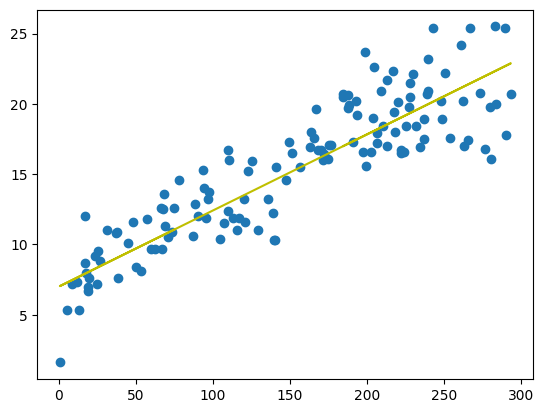

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 6.9955 +0.0541 * x_train, 'y')
plt.show()

In [ ]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

115    1.222245
130   -5.872157
156    2.935347
199   -1.219407
35    -4.895590
         ...   
164   -1.687777
87     2.753438
14     0.850442
193    3.408491
139    3.558338
Name: Sales, Length: 134, dtype: float64

In [ ]:
y_train_pred

array([11.37775483,  7.47215682, 12.36465325, 19.61940653, 22.69558991,
       16.00777827, 12.45914352, 15.65606447, 11.28851401, 14.85289714,
        8.4643047 ,  8.42230902, 12.5536338 , 20.75853928, 21.22574119,
       16.72695424, 19.28869057, 17.14166156, 11.14152914, 10.24387154,
       16.62721451,  8.41705957,  9.37246123, 15.29385175, 18.19680296,
       19.1942003 , 14.75840686,  8.04959739,  9.4407042 , 19.89762789,
       13.89749548, 16.01827719, 16.36999099, 11.02604103, 17.29389589,
       18.64300703, 22.35962449, 20.4960663 , 19.11020894, 16.42773504,
       17.60361401, 20.47506846, 17.57736671, 13.74526114, 17.32539265,
       17.80834294, 10.94729913, 10.90530346, 21.15224876, 13.52478384,
       13.19931734, 18.86348434, 20.20209656, 12.07068351, 22.14439664,
       18.29654269, 22.32287827, 10.45384992, 20.03936331,  8.77927228,
       17.92383105,  9.43020528,  9.97089963, 16.12851584, 14.22821144,
       19.89762789, 21.23624011, 18.63775757, 22.64309531, 14.74

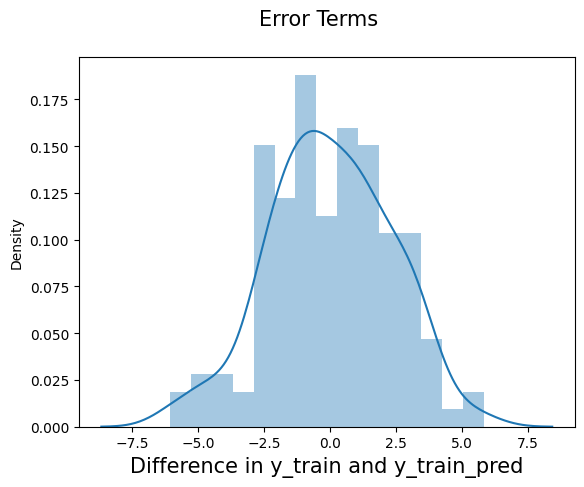

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

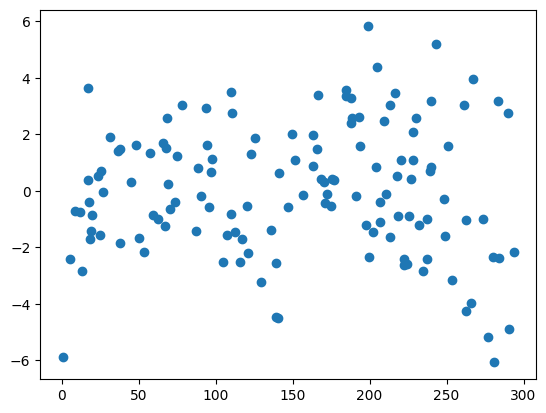

In [ ]:
plt.scatter(x_train, res)
plt.show

In [ ]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)


In [ ]:
y_pred

array([18.70600055, 20.84253064, 17.80834294, 18.97372299, 11.38825375,
       11.44074834, 11.35675699,  7.65063845, 11.4459978 , 13.76100952,
       17.69285483, 14.34894901, 16.72695424, 20.02361493,  9.50894718,
       11.4459978 , 18.99997029,  8.93675607, 11.39875267, 22.4488653 ,
        8.75302499, 14.74790794, 18.79524136,  9.69267827, 21.35697769,
       14.67441551, 19.48292058,  7.84486846, 14.5326801 , 17.92383105,
       16.92643371,  7.88686414,  7.87636522, 14.48543496,  8.33831767,
       17.88708484, 11.06803671, 12.70586813, 22.53285666, 22.81107802,
       10.38560695, 12.14417594, 17.02092399,  8.45380578, 14.31745225,
       19.93962357, 18.74274676, 18.90548001, 11.64547727, 22.20739015,
        7.81862116, 15.29910121, 18.50127162, 21.97116447,  8.12833928,
       12.48539082, 11.93419755, 22.99480911, 14.93688849, 16.07077178,
        9.77142016, 20.03936331, 20.12335466,  9.69792773,  8.87901202,
       12.8266057 ])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.289227669570391

In [ ]:
r2 = r2_score(y_test,y_pred)
r2

0.846532123927568

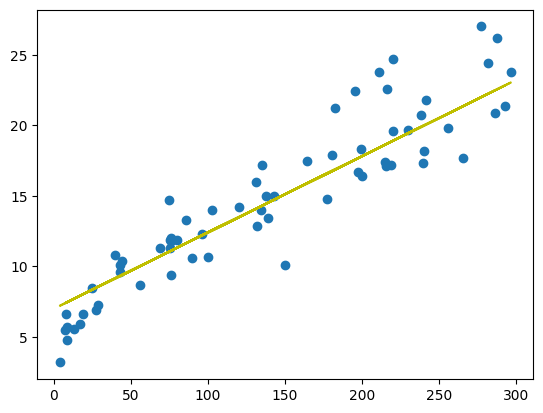

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test, 6.9955 +0.0541 * x_test, 'y')
plt.show()